<a href="https://colab.research.google.com/github/m-volnykh/Programming6/blob/main/LR04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4

Выполнила Вольных М. В., 3 курс ИВТ, 2-1

## 1. Загрузка данных

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
!git clone https://github.com/m-volnykh/Programming6/

In [3]:
training_data = pd.read_excel('/content/Programming6/Lab4/predict_house_price_training_data.xlsx')
type(training_data)

pandas.core.frame.DataFrame

In [4]:
training_data.sample(10)

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
3097,480000,4,2.50,2980,4074,2.0,0,0,3,8,2980,0,2011,0,47.7340,-121.965
7681,1600000,4,4.25,4645,7757,2.0,0,0,3,10,3855,790,2006,0,47.6248,-122.290
14078,506000,5,3.00,2430,8000,1.0,0,0,4,7,1370,1060,1957,0,47.6030,-122.120
10966,465000,3,1.50,1280,4720,1.0,0,0,4,7,850,430,1941,0,47.5509,-122.377
1151,759000,5,2.75,3490,8230,2.0,0,0,3,10,3490,0,2005,0,47.5825,-121.970
4799,658500,2,1.00,1410,5101,1.5,0,0,3,8,1410,0,1927,0,47.6872,-122.333
803,560000,3,2.75,1620,7500,1.0,0,0,5,7,1140,480,1979,0,47.6175,-122.065
10970,663500,2,1.00,1310,5200,1.0,0,0,3,7,910,400,1946,0,47.6784,-122.304
10399,579950,3,3.50,1420,1217,2.0,0,0,3,8,1180,240,2003,0,47.6827,-122.324
6357,425500,3,2.50,1970,2752,2.0,0,0,3,8,1970,0,1978,0,47.6345,-122.108


In [5]:
training_data.shape

(15129, 16)

## 2. Обработка данных перед обучением

**Анализ данных:**

In [6]:
# 1. TO DO
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

Пустых значений нет (количество non-null элементов каждого столбца совпадает с количеством строк в таблице).

Все значения числовые (int64, flodt64).

**Выбор целевой переменной:**

In [7]:
target_variable_name = 'Целевая.Цена'

training_values = training_data[target_variable_name]
training_values.shape

(15129,)

In [8]:
#  2. TO DO

training_points = training_data.drop(target_variable_name, axis=1)
training_points.shape

(15129, 15)

In [9]:
training_points.head(3)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115


## 3. Обучение модели

**Модель линейной регресии:**




In [10]:
from sklearn import linear_model, ensemble

lr_model = linear_model.LinearRegression()

# 4. TO DO:
lr_model.fit(training_points, training_values)
lr_model

LinearRegression()

**Модель решающего леса:**

In [11]:
# 3. TO DO:
rf_model = ensemble.RandomForestRegressor()

# 5. TO DO:
rf_model.fit(training_points, training_values)
rf_model

RandomForestRegressor()

## 4. Загрузка и предобработка данных тестирования

In [12]:
test_data = pd.read_excel('/content/Programming6/Lab4/predict_house_price_test_data.xlsx')
test_data.shape

(6484, 16)

In [13]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [14]:
# 6. TO DO:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

В таблице нет пропусков, все данные числовые.

**Отделяем целевую переменную:**

In [15]:
test_values = test_data[target_variable_name]
print(target_variable_name)
print('Shape: ', test_values.shape)

Целевая.Цена
Shape:  (6484,)


In [16]:
# 7. TO DO:
test_points = test_data.drop(target_variable_name, axis=1)
test_points.shape

(6484, 15)

In [17]:
test_points.head(3)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331


## 5. Валидация модели на тестовой выборке

In [18]:
lr_predict = lr_model.predict(test_points)

# 8. TO DO:
rf_predict = rf_model.predict(test_points)

Визуализация прогнозов:

In [19]:
%matplotlib inline

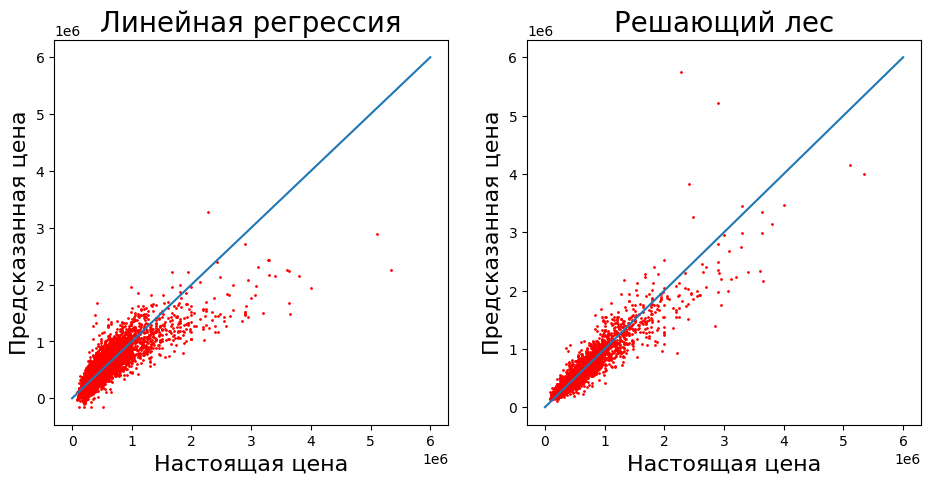

In [20]:
plt.figure(figsize=(60, 5))
# Линейная регрессия
plt.subplot(1, 10, 1)
plt.scatter(test_values, lr_predict, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=16)
plt.ylabel('Предсказанная цена', fontsize=16);
plt.title('Линейная регрессия', fontsize=20);
# Решающий лес
plt.subplot(1, 10, 2)
plt.scatter(test_values, rf_predict, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=16)
plt.ylabel('Предсказанная цена', fontsize=16);
plt.title('Решающий лес', fontsize=20);

Визуально прогноз решающего леса выглядит более точным, т.к. точки располагаются плотнее к прямой правильных решений.

**Проверка качества с помощью метрик регрессионной модели:**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Таблица для удобства хранения и отображения результатов
metrics = pd.DataFrame(index=['MAE', 'RMSE'], columns = ['Linear Regression', 'Random Forest Regressor'])

# 9. TO DO: метрики линейной регрессии
metrics['Linear Regression'] = [mean_absolute_error(test_values, lr_predict), np.sqrt(mean_squared_error(test_values, lr_predict))]

# 10. TO DO: метрики решающего леса
metrics['Random Forest Regressor'] = [mean_absolute_error(test_values, rf_predict), np.sqrt(mean_squared_error(test_values, rf_predict))]

metrics


,Linear Regression,Random Forest Regressor
MAE,126852.512550,70551.241405
RMSE,201883.242903,135664.653477


На основании сравнения метрик можно сделать вывод, что модель Случайного Леса сработала лучше модели Линейной Регрессии

## 6. Выявление важных признаков

In [22]:
training_points.head(10)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407
5,3,2.25,2300,9914,2.0,0,0,4,8,2300,0,1980,0,47.5677,-122.086
6,3,2.50,2770,8820,1.0,0,0,3,7,1900,870,1980,2004,47.3685,-122.048
7,2,1.75,1650,7500,1.0,0,0,4,7,1000,650,1959,0,47.6871,-122.207
8,1,1.00,580,1799,1.0,0,0,3,7,580,0,1908,2005,47.6829,-122.375
9,2,1.00,900,3400,1.0,0,0,5,6,900,0,1905,0,47.5269,-122.314


In [23]:
training_points['Год реновации'].value_counts()

,count
Год реновации,
0,14490
2014,63
2013,31
2000,28
2003,24
...,...
1950,1
1954,1
1946,1


Количество нулей указывает на заполненные пропуски данных, причем их существенно больше любых других значений (14490 из 15129), что может негативно повлиять на качество модели.

In [24]:
# 11. TO DO
rf_model = ensemble.RandomForestRegressor()
rf_model.fit(training_points, training_values)

RandomForestRegressor()

In [25]:
lst = rf_model.feature_importances_
print(lst)
print(sum(lst))

[0.00430841 0.00922743 0.31388392 0.02669602 0.00267922 0.0326804
 0.01549475 0.00411466 0.28195862 0.02665527 0.00648979 0.02912625
 0.00245751 0.17278247 0.07144529]
1.0


In [26]:
training_points.keys()

Index(['Спальни', 'Ванные', 'Жилая площадь', 'Общая площадь',
       'Количество этажей', 'Вид на воду', 'Просмотрены ранее', 'Состояние',
       'Оценка риелтора', 'Площадь без подвала', 'Площадь подвала',
       'Год постройки', 'Год реновации', 'Широта', 'Долгота'],
      dtype='object')

In [27]:
# Создание таблицы признаков
feature_importance = pd.DataFrame(columns=['Название признака', 'Важность признака'])

feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = lst

# Сортировка по убыванию
feature_importance.sort_values(by=['Важность признака'], ascending=False)

,Название признака,Важность признака
2,Жилая площадь,0.313884
8,Оценка риелтора,0.281959
13,Широта,0.172782
14,Долгота,0.071445
5,Вид на воду,0.032680
11,Год постройки,0.029126
3,Общая площадь,0.026696
9,Площадь без подвала,0.026655
6,Просмотрены ранее,0.015495
1,Ванные,0.009227


### TO DO: 5 наиболее и наименее значимых признаков

Исходя из таблицы выше, можно выделить топ-5 признаков:
1.   Оценка риелтора (0.31)
2.   Жилая площадь   (0.29)
3.   Широта          (0.17)
4.   Долгота         (0.07)
5.   Год постройки   (0.03)

Боттом-5:
1.   Год ренновации  (0.002)
2.   Кол-во этажей   (0.003)
3.   Спальни         (0.003)
4.   Состояние       (0.004)
5.   Площадь подвала (0.006)





## Самостоятельная работа

### 1. Исключение незначащих параметров из выборки

Уберём из выборки параметры, чья важность была оценена меньше 1%.

In [28]:
nonvalueable_features = feature_importance[round(feature_importance['Важность признака'], 2) < 0.01]
nonvalueable_features

,Название признака,Важность признака
0,Спальни,0.004308
4,Количество этажей,0.002679
7,Состояние,0.004115
12,Год реновации,0.002458


In [29]:
training_points_filtred = training_points.drop(nonvalueable_features['Название признака'], axis=1)
training_points_filtred.head(3)

,Ванные,Жилая площадь,Общая площадь,Вид на воду,Просмотрены ранее,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Широта,Долгота
0,3.50,3490,21780,0,0,8,3490,0,1996,47.6707,-122.144
1,1.75,2360,7620,0,0,7,1180,1180,1955,47.5278,-122.345
2,2.75,2040,8560,0,2,7,1100,940,1961,47.6160,-122.115


In [30]:
test_points_filtred = test_points.drop(nonvalueable_features['Название признака'], axis=1)
test_points_filtred.head(3)

,Ванные,Жилая площадь,Общая площадь,Вид на воду,Просмотрены ранее,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Широта,Долгота
0,1.00,1300,10139,0,0,7,1300,0,1962,47.3427,-122.087
1,2.75,3280,6845,0,0,10,3280,0,2003,47.7042,-122.107
2,1.00,1220,12426,0,4,6,1220,0,1946,47.4047,-122.331


In [31]:
rf_model_filtred = ensemble.RandomForestRegressor()
rf_model_filtred.fit(training_points_filtred, training_values)

RandomForestRegressor()

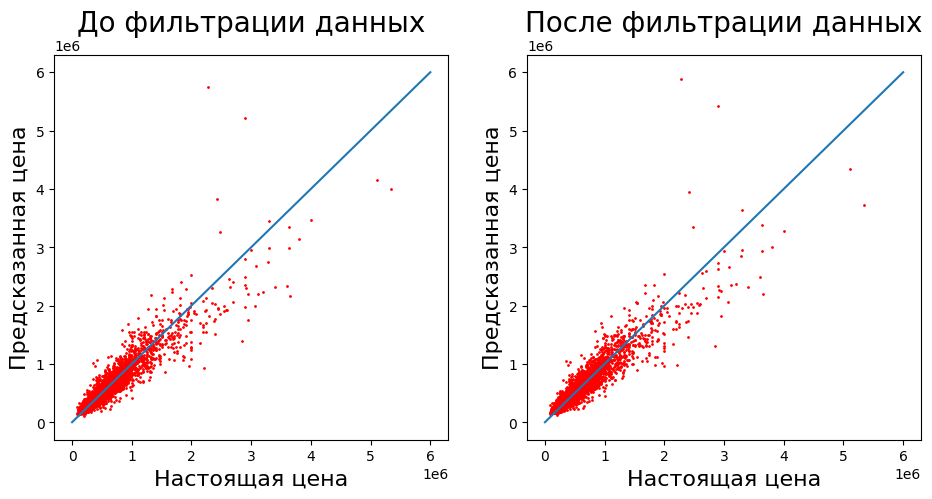

In [32]:
rf_filtred_predict = rf_model_filtred.predict(test_points_filtred)

plt.figure(figsize=(60, 5))
# Решающий лес
plt.subplot(1, 10, 1)
plt.scatter(test_values, rf_predict, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=16)
plt.ylabel('Предсказанная цена', fontsize=16);
plt.title('До фильтрации данных', fontsize=20);
# Решающий лес Измененный
plt.subplot(1, 10, 2)
plt.scatter(test_values, rf_filtred_predict, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=16)
plt.ylabel('Предсказанная цена', fontsize=16);
plt.title('После фильтрации данных', fontsize=20);

In [33]:
metrics['Random Forest Regressor Improved'] = [mean_absolute_error(test_values, rf_filtred_predict), np.sqrt(mean_squared_error(test_values, rf_filtred_predict))]
metrics.drop(['Linear Regression'], axis=1)

,Random Forest Regressor,Random Forest Regressor Improved
MAE,70551.241405,71210.848213
RMSE,135664.653477,136720.964685


Из таблицы выше, можно сделать вывод, что фильтрация незначимых признаков не внесла значительных изменений.

### 2. Исследование параметров модели с целью улучшения результата

Использование сетки параметров и RandomizedSearch, чтобы найти оптимальные гиперпараметры модели для данного набора данных.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rf = ensemble.RandomForestRegressor()

# Уменьшение выборки для оптимизации поиска
training_data_reduced = training_data.sample(n=2000, random_state=42)

param_grid = {
    'n_estimators': [140, 150, 160],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2,3,5]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

random_search.fit(training_data_reduced.drop(target_variable_name, axis=1), training_data_reduced[target_variable_name])

print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший результат кросс-валидации: {random_search.best_score_:.3f}")

Лучшие параметры: {'n_estimators': 140, 'min_samples_split': 3, 'max_depth': 20, 'criterion': 'absolute_error'}
Лучший результат кросс-валидации: 0.792


In [35]:
rf_better_params = random_search.best_estimator_

rf_better_params.fit(training_points, training_values)

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=3, n_estimators=140)

In [36]:
rf_better_params_predict = rf_better_params.predict(test_points)
metrics['Random Forest Regressor Better Params'] = [mean_absolute_error(test_values, rf_better_params_predict),
                                                    np.sqrt(mean_squared_error(test_values, rf_better_params_predict))]
metrics[['Random Forest Regressor Better Params','Random Forest Regressor']]

,Random Forest Regressor Better Params,Random Forest Regressor
MAE,72388.384279,70551.241405
RMSE,135819.662306,135664.653477


Изменение гиперпараметров модели не привело к значительному улучшению.

### Исследование других моделей в поиске лучшей реализации предсказания.

In [37]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5)
lasso_model.fit(training_points, training_values)

LassoCV(cv=5)

In [38]:
lasso_predict = lasso_model.predict(test_points)
metrics['Lasso Regression'] = [mean_absolute_error(test_values, lasso_predict), np.sqrt(mean_squared_error(test_values, lasso_predict))]
metrics[['Lasso Regression', 'Random Forest Regressor']]

,Lasso Regression,Random Forest Regressor
MAE,172054.038585,70551.241405
RMSE,258667.311381,135664.653477


In [39]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV()
ridge_model.fit(training_points, training_values)

ridge_predict = ridge_model.predict(test_points)
metrics['Ridge Regression'] = [mean_absolute_error(test_values, ridge_predict), np.sqrt(mean_squared_error(test_values, ridge_predict))]
metrics[['Ridge Regression', 'Random Forest Regressor']]

,Ridge Regression,Random Forest Regressor
MAE,126834.145130,70551.241405
RMSE,201862.911936,135664.653477


In [40]:
from sklearn.linear_model import ElasticNetCV

en_model = ElasticNetCV()
en_model.fit(training_points, training_values)

en_predict = en_model.predict(test_points)
metrics['ElasticNet Regression'] = [mean_absolute_error(test_values, en_predict), np.sqrt(mean_squared_error(test_values, en_predict))]
metrics[['Ridge Regression','Random Forest Regressor']]

,Ridge Regression,Random Forest Regressor
MAE,126834.145130,70551.241405
RMSE,201862.911936,135664.653477


In [41]:
from keras import Sequential
from keras.layers import Dense, LeakyReLU

seq_model = Sequential()

seq_model.add(Dense(100, input_dim=training_points.shape[1], activation='sigmoid'))

#seq_model.add(LeakyReLU(alpha=1.0))

seq_model.add(Dense(50, activation='sigmoid'))

#seq_model.add(LeakyReLU(alpha=1.0))

seq_model.add(Dense(25, activation='softmax'))

seq_model.add(Dense(1, activation='linear'))

seq_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
seq_model.fit(training_points, training_values)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 431715057664.0000 - mae: 542965.6250


In [42]:
seq_predict = seq_model.predict(test_points)
metrics['Sequential Regression'] = [mean_absolute_error(test_values, seq_predict), np.sqrt(mean_squared_error(test_values, seq_predict))]
metrics[['Sequential Regression', 'Random Forest Regressor']]

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Sequential Regression,Random Forest Regressor
MAE,543416.625000,70551.241405
RMSE,656925.031315,135664.653477
